# Name: Aishwarya Khairnar

# Task 2: Unemployment Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar
import datetime as dt

import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [3]:
df = pd.read_csv(r"Unemployment.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.shape

(267, 9)

In [6]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
df.columns =['States','Date','Frequency','Estimated Unemployment Rate',
             'Estimated Employed','Estimated Labour Participation Rate',
             'Region','longitude','latitute'] 

In [8]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['Frequency']= df['Frequency'].astype('category')
df['Month'] =  df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x : int(x))

In [9]:
df['Month_name'] =  df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df['Region'] = df['Region'].astype('category')

In [10]:
df.drop(columns='Month',inplace=True)
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitute,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


In [11]:
df_stats = df[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate']]


round(df_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [12]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate',
                                       'Estimated Employed',
                                       'Estimated Labour Participation Rate']].mean().reset_index()

region_stats = round(region_stats,2)

region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


<Axes: >

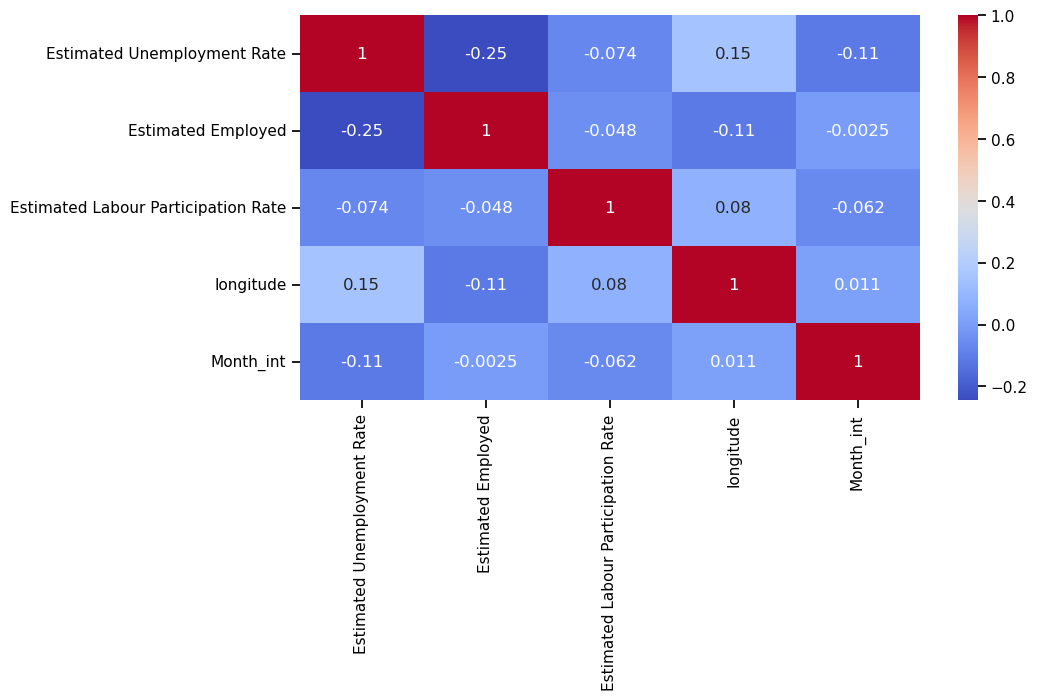

In [20]:
heat_maps = df[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate',
       'longitude', 'Month_int']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='coolwarm')

In [ ]:
fig = px.box(df,x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment rate',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()
plt.show()

# The below box shows unemployement rate in each state in India

In [ ]:
plot_ump = df[['Estimated Unemployment Rate','States']]

df_unemp = plot_ump.groupby('States').mean().reset_index()

df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

In [26]:
unemplo_df = df[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]

unemplo = unemplo_df.groupby(['Region','States'])['Estimated Unemployment Rate'].mean().reset_index()

In [25]:
fig = px.sunburst(unemplo, path=['Region','States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma',title= 'unemployment rate in each region and state',
                  height=650,template='ggplot2')


fig.show()